# Getting started with dpEmu

Let's start by importing some of the packages, classes and functions that we will use in the tutorial.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from dpemu.dataset_utils import load_mnist
from dpemu.nodes import Array, Series
from dpemu.problemgenerator.filters import GaussianNoise, Missing

In this tutorial we will be using the famous MNIST dataset of handwritten digits. DpEmu provides a convenience function for downloading the dataset. 

In [32]:
x, y, _, _ = load_mnist()

It's a good idea to start by exploring the shape and the data type as well as the minimimun and maximum values of the input data:

In [26]:
print(f"shape: {x.shape}")
print(f"dtype: {x.dtype}")
print(f"min: {x.min()}, max: {x.max()}")

shape: (70000, 784)
dtype: float64
min: 0.0, max: 255.0


Now let's do the same for the output data:

In [30]:
print(f"shape: {y.shape}")
print(f"dtype: {y.dtype}")
print(f"min: {y.min()}, max: {y.max()}")

shape: (70000,)
dtype: int64
min: 0, max: 9


Now let's pick a data point at random and display the image and its label. 

The label of the image at index 26699 is 7.


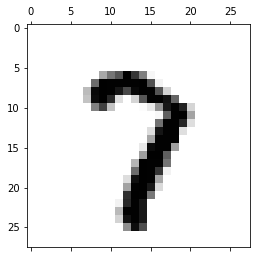

In [47]:
ind = np.random.randint(x.shape[0])
plt.matshow(x[ind].reshape((28, 28)), cmap='gray_r')
print(f"The label of the image at index {ind} is {y[ind]}.")

Now that we know our data – superficially at least – we can start adding errors. First we must model the shape of the data as a tree. If that sounds complicated, don't worry – it's ridiculously easy!

Since the inputs are an indexed collection of images, it's natural to represent them as a series of arrays, each array corresponding to a single image. Let's do just that:

In [51]:
image_node = Array()
series_node = Series(image_node)

The Series node is the root of the tree, and the Array node is its only child.

We can now add one or more error sources. Error sources are known as Filters in dpEmu parlance, and they can be attached to Array nodes (and indeed some other kinds of nodes which we will not discuss in this tutorial). 

In [52]:
gaussian_noise_source = GaussianNoise("mean", "std")
image_node.addfilter(gaussian_noise_source)

The GaussianNoise Filter does exactly what it sounds like: it adds noise drawn from a Normal distribution. The constructor takes two String arguments – namely, identifiers for the parameters (the mean and the standard deviation) of the distribution. The values of these parameters will be provided later.

Let's take a small subset of the data and try applying our error generating tree!

In [67]:
n = 1000
x_subset = x[:n]

params = {"mean": 0.0, "std": 20.0}
subset_with_errors = series_node.generate_error(x_subset, params)

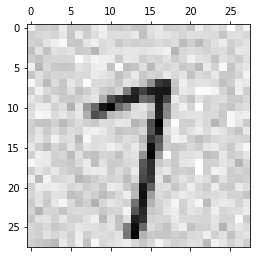

In [68]:
plt.matshow(subset_with_errors[42].reshape((28, 28)), cmap='gray_r')